In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess as sp
import time
import multiprocessing as mp
import random
colors = "rgbcmykw"
getVals = lambda x: list(dict(x).values())
getKeys = lambda x: list(dict(x).keys())

In [2]:
def failures(G):
    G = G.copy()
    size = len(G.nodes)
    fractionRemoved = []
    fractionLargest = []
    
    nSteps = np.int32(np.linspace(1, int(0.99*size), num=20))
    removalsPerStep = np.append([0], np.diff(nSteps)) # First run performs no removals

    for n, removals in zip(nSteps, removalsPerStep):
        print(n, end=" ")
        
        for i in range(removals):
            node = random.choice(list(G.nodes))
            G.remove_node(node) 
        
        largest = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
        
        fractionLargest.append(len(largest.nodes)/size)
        fractionRemoved.append(n/size)

    return np.array(fractionLargest), np.array(fractionRemoved)

def failuresAverage(graph_generator, repeat=10):
    allLarg = None
    allRem  = None
    
    for i in range(repeat):
        larg, rem = failures(graph_generator())
        
        if allLarg is None:
            allLarg = larg
            allRem = rem
        else:
            allLarg = allLarg + larg
            allRem  = allRem + rem
    
    return allLarg / repeat, allRem / repeat


result = failuresAverage(lambda: nx.erdos_renyi_graph(1000, 0.001))

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 

(array([0.0807, 0.0591, 0.0436, 0.0325, 0.0271, 0.0222, 0.0188, 0.0153,
        0.0132, 0.0104, 0.0083, 0.0077, 0.0069, 0.006 , 0.005 , 0.0045,
        0.0034, 0.0026, 0.0022, 0.0011]),
 array([0.001, 0.053, 0.105, 0.157, 0.209, 0.261, 0.313, 0.365, 0.417,
        0.469, 0.521, 0.573, 0.625, 0.677, 0.729, 0.781, 0.833, 0.885,
        0.937, 0.99 ]))

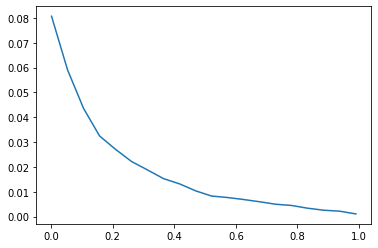

In [3]:
plt.plot(result[1], result[0])
result

In [4]:
def attacks(G):
    G = G.copy()
    size = len(G.nodes)
    fractionRemoved = []
    fractionLargest = []
    
    nSteps = np.int32(np.linspace(1, int(0.99*size), num=20))
    removalsPerStep = np.append([0], np.diff(nSteps)) # First run performs no removals

    for n, removals in zip(nSteps, removalsPerStep):
        print(n, end=" ")
        
        for i in range(removals):
            # Matrix of two columns (key, value)
            M = np.matrix(list(G.degree))
            idx = np.argmax(M[:,1]) # Row index of maximum degree
            node = M[idx,0]
            G.remove_node(node)
        
        largest = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
        
        fractionLargest.append(len(largest.nodes)/size) #store the size of the largest component
        fractionRemoved.append(n/size)

    return np.array(fractionLargest), np.array(fractionRemoved)

def attacksAverage(graph_generator, repeat=10):
    allLarg = None
    allRem  = None
    
    for i in range(repeat):
        larg, rem = failures(graph_generator())
        
        if allLarg is None:
            allLarg = larg
            allRem = rem
        else:
            allLarg = allLarg + larg
            allRem  = allRem + rem
    
    return allLarg / repeat, allRem / repeat


result2 = attacksAverage(lambda: nx.erdos_renyi_graph(1000, 0.001))

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 

Text(0, 0.5, 'Size of largest component')

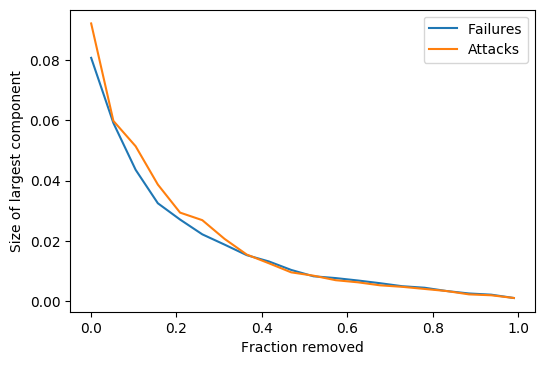

In [5]:
plt.figure(dpi=100)
plt.plot(result[1], result[0], label="Failures")
plt.plot(result2[1], result2[0], label="Attacks")
plt.legend()
plt.xlabel("Fraction removed")
plt.ylabel("Size of largest component")

In [7]:
def moment2(G):
    values = getVals(G.degree)
    probs, bins = np.histogram(values, density=True, bins=np.arange(0, max(values)+2))
    degs = bins[:-1] # The last bin is the right open bound of the last interval
    return (degs**2).dot(probs)

def criticalF(G):
    m1 = np.mean(getVals(G.degree))
    m2 = moment2(G)
    return 1 - 1 / (m2 / m1 - 1)

G = nx.erdos_renyi_graph(1000, 0.001)
criticalF(G)

0.023575638506876384

# Problem 1

In [205]:
result = dict()
result["erdos-renyi"] = failuresAverage(lambda: nx.erdos_renyi_graph(1000, 10 / 999), repeat=10)
result["watts-strogatz-0.1"] = failuresAverage(lambda: nx.generators.watts_strogatz_graph(1000, 10, 0.1), repeat=10)
result["watts-strogatz-0.01"] = failuresAverage(lambda: nx.generators.watts_strogatz_graph(1000, 10, 0.01), repeat=10)
result["watts-strogatz-0.001"] = failuresAverage(lambda: nx.generators.watts_strogatz_graph(1000, 10, 0.001), repeat=10)
result["barabasi-albert"] = failuresAverage(lambda: nx.generators.barabasi_albert_graph(1000, 5), repeat=10)
result

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990

{'erdos-renyi': (array([0.9999, 0.9479, 0.896 , 0.8438, 0.7917, 0.7393, 0.6869, 0.6349,
         0.5821, 0.5288, 0.4758, 0.4212, 0.3658, 0.3087, 0.2507, 0.1869,
         0.1125, 0.0293, 0.0075, 0.0017]),
  array([0.001, 0.053, 0.105, 0.157, 0.209, 0.261, 0.313, 0.365, 0.417,
         0.469, 0.521, 0.573, 0.625, 0.677, 0.729, 0.781, 0.833, 0.885,
         0.937, 0.99 ])),
 'watts-strogatz-0.1': (array([1.    , 0.948 , 0.896 , 0.844 , 0.792 , 0.74  , 0.688 , 0.636 ,
         0.584 , 0.5314, 0.4757, 0.418 , 0.3543, 0.261 , 0.1462, 0.055 ,
         0.0237, 0.0086, 0.0043, 0.0013]),
  array([0.001, 0.053, 0.105, 0.157, 0.209, 0.261, 0.313, 0.365, 0.417,
         0.469, 0.521, 0.573, 0.625, 0.677, 0.729, 0.781, 0.833, 0.885,
         0.937, 0.99 ])),
 'watts-strogatz-0.01': (array([1.    , 0.948 , 0.896 , 0.844 , 0.792 , 0.74  , 0.688 , 0.6352,
         0.5558, 0.4521, 0.3434, 0.1902, 0.0875, 0.052 , 0.0302, 0.0201,
         0.0121, 0.0069, 0.0043, 0.0017]),
  array([0.001, 0.053, 0.105, 0.1

Text(0.5, 1.0, 'Failure analysis averaged over 10 trials')

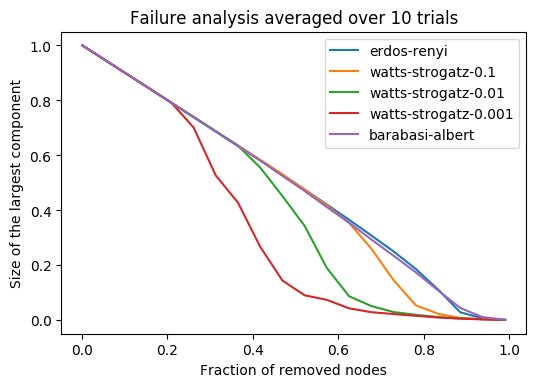

In [207]:
plt.figure(dpi=100)
for k in result:
    vectors = result[k]
    plt.plot(vectors[1], vectors[0], label=k)
plt.legend()
plt.ylabel("Size of the largest component")
plt.xlabel("Fraction of removed nodes")
plt.title("Failure analysis averaged over 10 trials")

In [208]:
result = dict()
result["erdos-renyi"] = attacksAverage(lambda: nx.erdos_renyi_graph(1000, 10 / 999), repeat=10)
result["watts-strogatz-0.1"] = attacksAverage(lambda: nx.generators.watts_strogatz_graph(1000, 10, 0.1), repeat=10)
result["watts-strogatz-0.01"] = attacksAverage(lambda: nx.generators.watts_strogatz_graph(1000, 10, 0.01), repeat=10)
result["watts-strogatz-0.001"] = attacksAverage(lambda: nx.generators.watts_strogatz_graph(1000, 10, 0.001), repeat=10)
result["barabasi-albert"] = attacksAverage(lambda: nx.generators.barabasi_albert_graph(1000, 5), repeat=10)
result

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990

{'erdos-renyi': (array([1.    , 0.9479, 0.8959, 0.8439, 0.7919, 0.7395, 0.6873, 0.6346,
         0.5813, 0.529 , 0.4758, 0.4213, 0.3661, 0.3086, 0.2493, 0.1819,
         0.1012, 0.0238, 0.0065, 0.0011]),
  array([0.001, 0.053, 0.105, 0.157, 0.209, 0.261, 0.313, 0.365, 0.417,
         0.469, 0.521, 0.573, 0.625, 0.677, 0.729, 0.781, 0.833, 0.885,
         0.937, 0.99 ])),
 'watts-strogatz-0.1': (array([1.    , 0.948 , 0.896 , 0.844 , 0.792 , 0.74  , 0.688 , 0.636 ,
         0.584 , 0.5319, 0.4767, 0.4215, 0.3554, 0.2837, 0.1899, 0.0845,
         0.0343, 0.0104, 0.0055, 0.0012]),
  array([0.001, 0.053, 0.105, 0.157, 0.209, 0.261, 0.313, 0.365, 0.417,
         0.469, 0.521, 0.573, 0.625, 0.677, 0.729, 0.781, 0.833, 0.885,
         0.937, 0.99 ])),
 'watts-strogatz-0.01': (array([1.    , 0.948 , 0.896 , 0.844 , 0.792 , 0.74  , 0.6865, 0.6229,
         0.5541, 0.4636, 0.3187, 0.1598, 0.1023, 0.0459, 0.0305, 0.0171,
         0.0103, 0.0069, 0.004 , 0.0016]),
  array([0.001, 0.053, 0.105, 0.1

Text(0.5, 1.0, 'Attack analysis averaged over 10 trials')

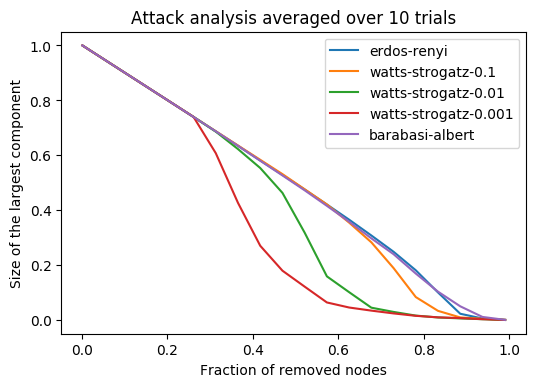

In [209]:
plt.figure(dpi=100)
for k in result:
    vectors = result[k]
    plt.plot(vectors[1], vectors[0], label=k)
plt.legend()
plt.ylabel("Size of the largest component")
plt.xlabel("Fraction of removed nodes")
plt.title("Attack analysis averaged over 10 trials")

### We see that for both cases, attack and failure, the erdos-renyi and barabasi-albert models presented best robustness.

### Small world models presented less robustness. The robustness reduces as the rate of rewiring decreases (lower $p$).

In [210]:
G1 = nx.read_edgelist("maayan-vidal.txt")
G2 = nx.read_edgelist("celegans-protein2007.txt")
G3 = nx.read_edgelist("aegypti.txt")

A = dict()
A["maayan-vidal"] = failuresAverage(lambda: G1, repeat=10)
A["celegans-protein"] = failuresAverage(lambda: G2, repeat=10)
A["aegypti"] = failuresAverage(lambda: G3, repeat=10)

1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 78 156 234 312 390 468 546 624 702 779 857 935 1013 1091 1169 1247 1325 1403 1481 1 78 1

Text(0.5, 1.0, 'Failure analysis averaged over 10 trials')

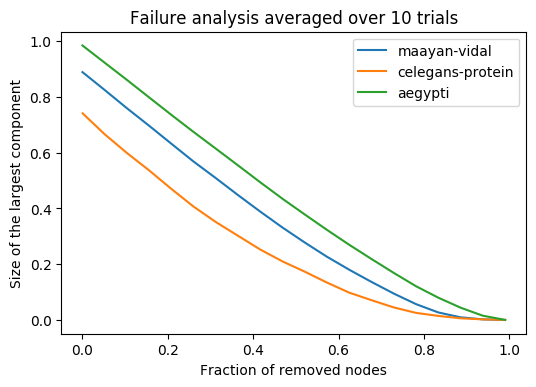

In [211]:
plt.figure(dpi=100)
for k in A:
    vectors = A[k]
    plt.plot(vectors[1], vectors[0], label=k)
plt.legend()
plt.ylabel("Size of the largest component")
plt.xlabel("Fraction of removed nodes")
plt.title("Failure analysis averaged over 10 trials")

In [212]:
B = dict()
B["maayan-vidal"] = attacksAverage(lambda: G1, repeat=10)
B["celegans-protein"] = attacksAverage(lambda: G2, repeat=10)
B["aegypti"] = attacksAverage(lambda: G3, repeat=10)

1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 78 156 234 312 390 468 546 624 702 779 857 935 1013 1091 1169 1247 1325 1403 1481 1 78 1

Text(0.5, 1.0, 'Attack analysis averaged over 10 trials')

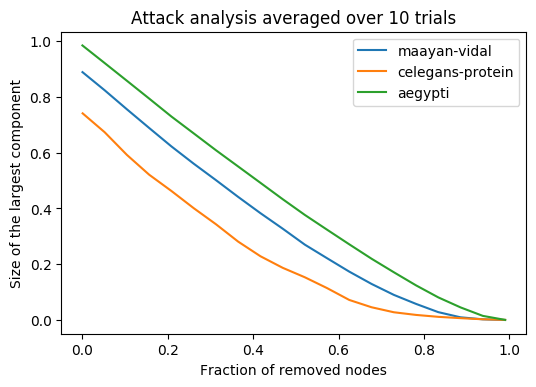

In [214]:
plt.figure(dpi=100)
for k in B:
    vectors = B[k]
    plt.plot(vectors[1], vectors[0], label=k)
plt.legend()
plt.ylabel("Size of the largest component")
plt.xlabel("Fraction of removed nodes")
plt.title("Attack analysis averaged over 10 trials")

### Interestingly enough, the aedes aegypti is the most robust.

In [223]:
strs = ["maayan", "celegans", "aegypti"]
for g, s in zip([G1, G2, G3], strs):
    print(s, nx.average_clustering(g))

maayan 0.06352810615464935
celegans 0.01308985928978111
aegypti 0.13529235173777246


### The higher robustness is likely due to its higher number of edges per node, represented here by its average clustering

In [321]:
allVecs = []
for idx, mu in enumerate([0.1, 0.3, 0.5]):
    G = lambda: nx.community.LFR_benchmark_graph(1000, tau1=3, tau2=1.5, mu=mu, average_degree=5, min_community=50, seed=10)
    vecs = failuresAverage(G, repeat=10)
    allVecs.append(vecs)

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990

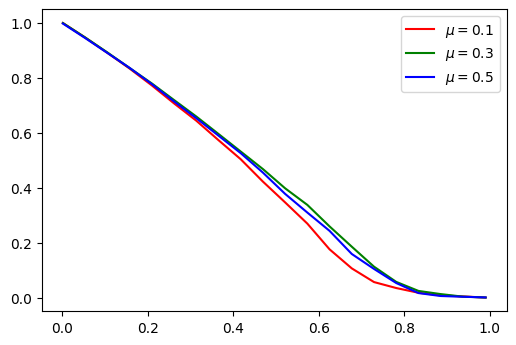

In [322]:
plt.figure(dpi=100)
for idx, mu in enumerate([0.1, 0.3, 0.5]):
    vec = allVecs[idx]
    plt.plot(vec[1], vec[0], c=colors[idx], label="$\mu = {}$".format(mu))
plt.legend()

### Apparently the graph is less robust for low $\mu$, that is, when the communities are more strongly connected, with few edges to other communities.

### This was more than expected; if we take a single community and analyze it in terms of its robustness, the results would likely be very different.

# Problem 1 (BONUS!)

In [411]:
def xalviBrunet(N=1000, assortative=True, rateRewires=0.3, repeatTimes=5):
    # First we create the power law degree sequence
    seq = sorted(np.int32(np.round(nx.utils.powerlaw_sequence(N, 3))))

    if np.sum(seq)%2 == 1:
        seq[-1] += 1

    # Then we get the configuration model
    G = nx.Graph(nx.configuration_model(seq))

    for _ in range(repeatTimes):
        # Now apply Xalvi-Brunet algorithm
        edges = list(G.edges)
        random.shuffle(edges)

        # Take rateRewrite edges
        edges = edges[1:int(rateRewires*len(edges))]

        # Get all nodes
        nodes = np.ravel(edges)

        # Sort them in decreasing order of degree
        degs = np.array([G.degree[i] for i in nodes ])
        idx = np.flip(np.argsort(degs)) # Reverses the array

        degs = degs[idx]
        nodes = nodes[idx]

        if assortative:
            while len(nodes) >= 4:
                G.add_edge(nodes[0], nodes[1])
                G.add_edge(nodes[2], nodes[3])
                nodes = nodes[4:]
        else:
            while len(nodes) >= 4:
                G.add_edge(nodes[0], nodes[-1])
                G.add_edge(nodes[1], nodes[-2])
                nodes = nodes[2:-2]
    
    return G

print("Purely random")
f = lambda: nx.erdos_renyi_graph(1000, 0.001)
print([ nx.degree_assortativity_coefficient(f()) for i in range(10) ])

print("\n\nAssortative Xalvi Brunet")
f = lambda: xalviBrunet(1000, True)
print([ nx.degree_assortativity_coefficient(f()) for i in range(10) ])

print("\n\nDisassortative Xalvi Brunet")
f = lambda: xalviBrunet(1000, False)
print([ nx.degree_assortativity_coefficient(f()) for i in range(10) ])

Purely random
[-0.10932985225613756, -0.04104688453061296, 0.006131992830285166, 0.018208470265577776, 0.059701071970565726, -0.02315726327447168, 0.05747279178238745, 0.03264563339271621, 0.007669816236379356, -0.012365751090405153]


Assortative Xalvi Brunet
[0.5504256467246054, 0.5759051379306491, 0.35578530086912086, 0.35399311612257717, 0.15931730827910917, 0.05184804335289518, 0.5286513622167291, 0.2634605841092607, 0.4639527641274826, 0.05837773396230574]


Disassortative Xalvi Brunet
[-0.28951372275904275, -0.3562632471426549, -0.2872208453154148, -0.1909878732707778, -0.17442580180561526, -0.19233347362373557, -0.2301207799139853, -0.17785458853753894, -0.12483446937236174, -0.20709031084155344]


In [584]:
A = dict()
f = lambda: nx.erdos_renyi_graph(1000, 0.01)
A["Purely Random"] = failuresAverage(f, repeat=10)

f = lambda: xalviBrunet(1000, True)
A["Assortative"] = failuresAverage(f, repeat=10)

f = lambda: xalviBrunet(1000, False)
A["Disassortative"] = failuresAverage(f, repeat=10)

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990

Text(0.5, 1.0, 'Failure analysis averaged over 10 trials')

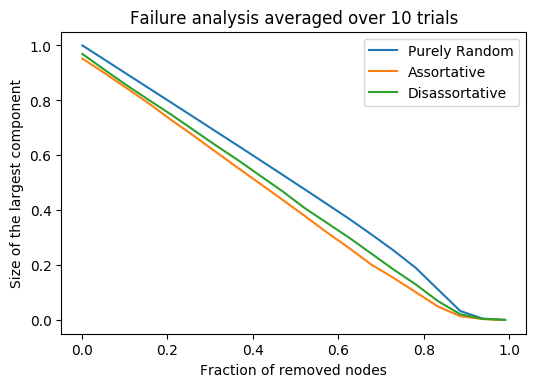

In [585]:
plt.figure(dpi=100)
for k in A:
    vectors = A[k]
    plt.plot(vectors[1], vectors[0], label=k)
plt.legend()
plt.ylabel("Size of the largest component")
plt.xlabel("Fraction of removed nodes")
plt.title("Failure analysis averaged over 10 trials")

In [586]:
A = dict()
f = lambda: nx.erdos_renyi_graph(1000, 0.01)
A["Purely Random"] = attacksAverage(f, repeat=10)

f = lambda: xalviBrunet(1000, True)
A["Assortative"] = attacksAverage(f, repeat=10)

f = lambda: xalviBrunet(1000, False)
A["Disassortative"] = attacksAverage(f, repeat=10)

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990

Text(0.5, 1.0, 'Attack analysis averaged over 10 trials')

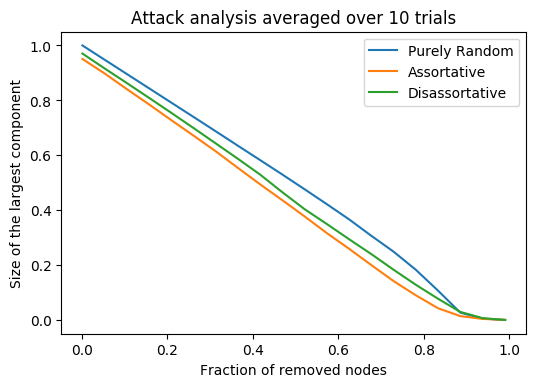

In [587]:
plt.figure(dpi=100)
for k in A:
    vectors = A[k]
    plt.plot(vectors[1], vectors[0], label=k)
plt.legend()
plt.ylabel("Size of the largest component")
plt.xlabel("Fraction of removed nodes")
plt.title("Attack analysis averaged over 10 trials")

### We see that the assortative graph is slighly less robust, but assortativity does not seem that much connected to robustness.

# Problem 2

### We first need to implement the simulation procedure........ Seems hard

### Well we have a graph G where a random node is chosen to be infected. At each time step, each infected node will try to infect its neighbors (with rate of success $\beta$), and besides this each infected node has some probability $\mu$ of becoming recovered.

In [80]:
meanK = 8
G1 = nx.erdos_renyi_graph(500, meanK / 499)
G2 = nx.generators.watts_strogatz_graph(500, meanK, 0.1)
G3 = nx.generators.watts_strogatz_graph(500, meanK, 0.01)
G4 = nx.generators.watts_strogatz_graph(500, meanK, 0.001)
G5 = nx.generators.barabasi_albert_graph(500, meanK//2)

allG = [G1, G2, G3, G4, G5]
for g in allG:
    print(np.mean(getVals(g.degree)))

7.744
8.0
8.0
8.0
7.936


In [295]:
def infectionSIS(G, numIterations=100, beta=0.5, mu=1):
    allNodes = list(G.nodes)
    infectedNodes = set([random.choice(allNodes)])
    healthyNodes = set([ i for i in allNodes if i not in infectedNodes ])

    result = {
        "infected": [len(infectedNodes)],
        "healthy": [len(healthyNodes)],
        "time": list(range(numIterations+1)),
        "mu": mu,
        "beta": beta
    }
    
    # Iterates over time steps
    for t in range(numIterations):
        # See which infected will recover (only at the end of this loop)
        rands = np.random.uniform(0, 1, len(infectedNodes))
        willRecover = rands < mu
        recoverNodes = [ node for rand, node in zip(willRecover, infectedNodes) if rand ]
        
        # First try to infect
        for i in infectedNodes:
            neighbors = set(G.neighbors(i))                 # Get neighbors            
            neighbors = neighbors.difference(infectedNodes) # We want only the non-infected ones
            neighbors = np.array(list(neighbors))
            
            rands = np.random.uniform(0, 1, len(neighbors)) # Generate a random number for each of them
            wasInfected   = rands < beta # See which of them become infected
            infectedNodes = infectedNodes.union(neighbors[wasInfected])
            healthyNodes  = healthyNodes.difference(neighbors[wasInfected])
            # print(infectedNodes)
            # print(healthyNodes)
        
        # Recover nodes
        infectedNodes = infectedNodes.difference(recoverNodes)
        healthyNodes  = healthyNodes.union(recoverNodes)
        #print(infectedNodes)
        #print(healthyNodes)
        
        result["infected"].append(len(infectedNodes))
        result["healthy"].append(len(healthyNodes))
    
    return result

result = infectionSIS(G1)

0.1 0.2 0.3 0.5 0.7 0.9 0.1 0.2 0.3 0.5 0.7 0.9 0.1 0.2 0.3 0.5 0.7 0.9 0.1 0.2 0.3 0.5 0.7 0.9 0.1 0.2 0.3 0.5 0.7 0.9 

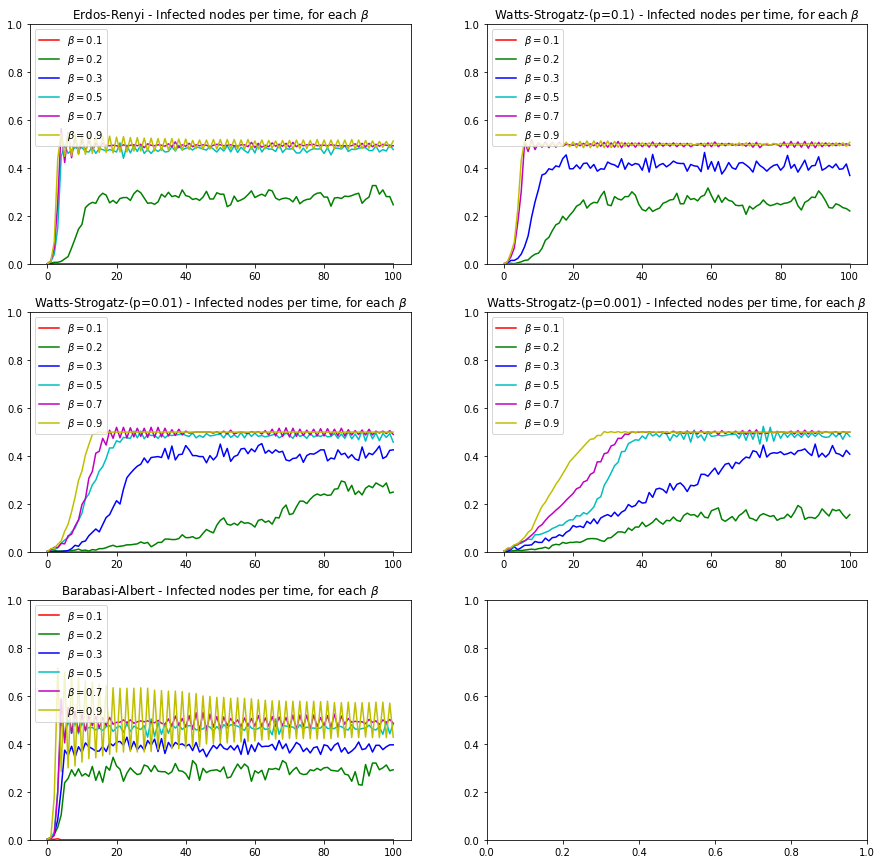

In [311]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
ax = np.ravel(ax)

names = ["Erdos-Renyi", "Watts-Strogatz-(p=0.1)", "Watts-Strogatz-(p=0.01)", "Watts-Strogatz-(p=0.001)", "Barabasi-Albert"]

for idx, G in enumerate(allG):
    for idx2, beta in enumerate([0.1, 0.2, 0.3, 0.5, 0.7, 0.9]):
        print(beta, end=" ")
        result = infectionSIS(G, beta=beta)
        ax[idx].plot(result["time"], np.array(result["infected"]) / 500,
                     c=colors[idx2 % len(colors)],
                     label="$β = {}$".format(np.round(result["beta"], decimals=2)))
        ax[idx].legend()
        ax[idx].set_title("{} - Infected nodes per time, for each $β$".format(names[idx]))
        ax[idx].set_ylim([0, 1])

### We can see that the watts-strogatz graphs, which can be considered as the most "regular" graphs here (or less "random", in a sense), presented much more difficulty for the infection to spread (it takes more time).

### In both the more random models, Erdos-Renyi and Barabasi-Albert, the infection spreaded very quickly. However, the barabasi albert presented much more variance in the number of individuals over time, whereas Erdos-Renyi presented a more stable behavior.

### One explanation I can think for this is that in the Barabasi-Albert model there are periods where lower-degree nodes are infected, leading to a lower amount of infections in the next period. However, the next period will have high-degree nodes infected, so they will spread to much more individuals in the next time step.

### In contrast, in the Erdos-Renyi model, if at each time step we take the sum of the degrees of the infected nodes it will be much more stable.

### Lastly, we see that for each $\beta$ there exist sort of an "average" towards which the number of infected individuals tend to.

In [348]:
def infectionSIR(G, numIterations=100, beta=0.5, mu=1):
    allNodes = list(G.nodes)
    infectedNodes = set([random.choice(allNodes)])
    healthyNodes = set([ i for i in allNodes if i not in infectedNodes ])
    recoveredNodes = set()
    
    result = {
        "infected": [len(infectedNodes)],
        "healthy": [len(healthyNodes)],
        "recovered": [len(recoveredNodes)],
        "time": list(range(numIterations+1)),
        "mu": mu,
        "beta": beta
    }
    
    # Iterates over time steps
    for t in range(numIterations):
        # See which infected will recover (only at the end of this loop)
        rands = np.random.uniform(0, 1, len(infectedNodes))
        willRecover = rands < mu
        recoverNodes = [ node for rand, node in zip(willRecover, infectedNodes) if rand ]
        
        # First try to infect
        for i in infectedNodes:
            neighbors = set(G.neighbors(i))                 # Get neighbors            
            neighbors = neighbors.difference(infectedNodes)  # We want only the non-infected ones
            neighbors = neighbors.difference(recoveredNodes) # Also remove the recovered ones (cant infect)
            neighbors = np.array(list(neighbors))
            
            rands = np.random.uniform(0, 1, len(neighbors)) # Generate a random number for each of them
            wasInfected   = rands < beta # See which of them become infected
            infectedNodes = infectedNodes.union(neighbors[wasInfected])
            healthyNodes  = healthyNodes.difference(neighbors[wasInfected])
            # print(infectedNodes)
            # print(healthyNodes)
        
        # Recover nodes
        infectedNodes = infectedNodes.difference(recoverNodes)
        recoveredNodes = recoveredNodes.union(recoverNodes)
        #print(infectedNodes)
        #print(healthyNodes)
        
        result["infected"].append(len(infectedNodes))
        result["healthy"].append(len(healthyNodes))
        result["recovered"].append(len(recoveredNodes))
    
    return result

result = infectionSIR(G1, numIterations=30, beta=0.3)

Text(0, 0.5, 'Amount of individuals')

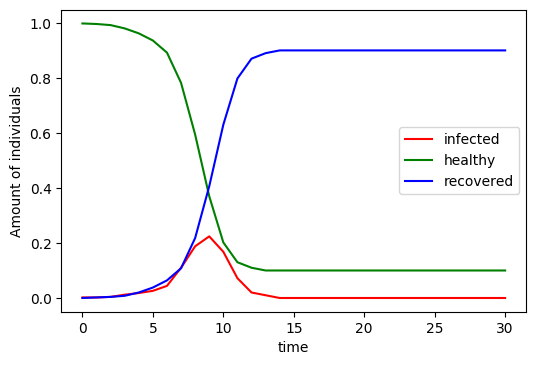

In [349]:
plt.figure(dpi=100)
plt.plot(result["time"], np.array(result["infected"])/500, c="r", label="infected")
plt.plot(result["time"], np.array(result["healthy"])/500, c="g", label="healthy")
plt.plot(result["time"], np.array(result["recovered"])/500, c="b", label="recovered")
plt.legend()
plt.xlabel("time")
plt.ylabel("Amount of individuals")

0.1 0.2 0.3 0.5 0.7 0.9 0.1 0.2 0.3 0.5 0.7 0.9 0.1 0.2 0.3 0.5 0.7 0.9 0.1 0.2 0.3 0.5 0.7 0.9 0.1 0.2 0.3 0.5 0.7 0.9 

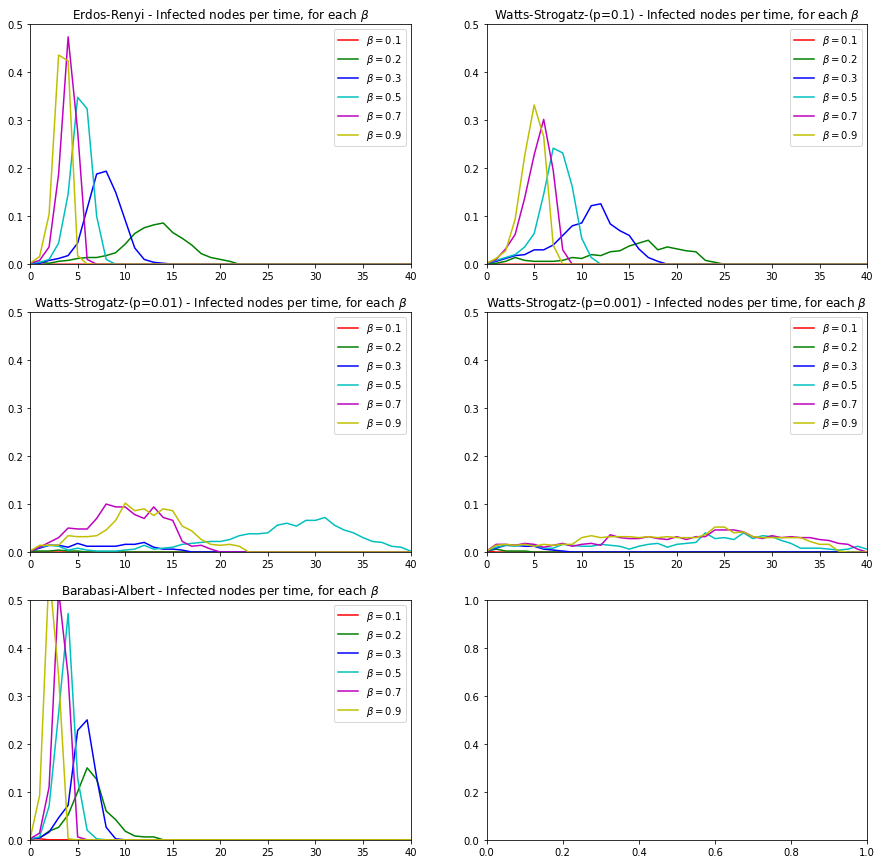

In [352]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
ax = np.ravel(ax)

names = ["Erdos-Renyi", "Watts-Strogatz-(p=0.1)", "Watts-Strogatz-(p=0.01)", "Watts-Strogatz-(p=0.001)", "Barabasi-Albert"]

for idx, G in enumerate(allG):
    for idx2, beta in enumerate([0.1, 0.2, 0.3, 0.5, 0.7, 0.9]):
        print(beta, end=" ")
        result = infectionSIR(G, beta=beta)
        ax[idx].plot(result["time"], np.array(result["infected"]) / 500,
                     c=colors[idx2 % len(colors)],
                     label="$β = {}$".format(np.round(result["beta"], decimals=2)))
        ax[idx].legend()
        ax[idx].set_title("{} - Infected nodes per time, for each $β$".format(names[idx]))
        ax[idx].set_ylim([0, 0.5])
        ax[idx].set_xlim([0, 40])

### Ooooh, interesting!

### We see here that some graph models presented a short abrupt epidemy, which rapidly faded out. On the other hand, in some models the infection lasted for a long time, though infecting fewer people in each time step.

### The most "randomic" models (Erdos-Renyi, Barabasi-Albert and Watts-Strogatz with p=0.1) presented the peak behavior. The most "regular" models (Watts-Strogatz with p=0.01 and p=0.001) presented the long-lasting infection pattern.

### One interesting point is that the Barabasi-Albert model seems to have its peak in a very low value of $t$ regardless of $\beta$. $\beta$ seems to mostly affect only the height of the peak. For the Erdos-Renyi model we see that $\beta$ greatly affects the $t$ at which the peak occurs.

### This can be because the peak in the Barabasi-Albert happens when the first hub node is infected; since it is a small-scale graph, this happens very quickly.

### We thus conclude that the (SIR) infection spreads more quickly and more intensively in a scale-free model. Cool.

# Problem 3

In [360]:
G1 = nx.read_edgelist("petser-hamster.tsv", comments="%")
G2 = nx.Graph(nx.to_undirected(nx.read_gml("celegansneural.gml")))
G3 = nx.read_weighted_edgelist("usairport.txt")
allG = [G1, G2, G3]

for G in allG:
    print(type(G))
    print(len(G.nodes))
    print(len(G.edges))

<class 'networkx.classes.graph.Graph'>
1858
12534
<class 'networkx.classes.graph.Graph'>
297
2148
<class 'networkx.classes.graph.Graph'>
1574
17215


### If I understood the problem correctly, at each time step $t$ I need to find the centrality of the infected nodes. So I need to redefine the SIR function

In [407]:
def mean(l):
    if len(l):
        return np.mean(l)
    else:
        return 0

def infectionSIR(G, numIterations=100, beta=0.3, mu=1):
    allNodes = list(G.nodes)
    infectedNodes = set([random.choice(allNodes)])
    healthyNodes = set([ i for i in allNodes if i not in infectedNodes ])
    recoveredNodes = set()
    
    print("degree", end=" ")
    degree = G.degree
    print("betweeness", end=" ")
    betweeness = nx.betweenness_centrality(G)
    print("closeness", end=" ")
    closeness = nx.closeness_centrality(G)
    print("eigen", end=" ")
    eigencentrality = nx.eigenvector_centrality_numpy(G)
    print("core", end=" ")
    cores = nx.core_number(G)
    
    # THIS TAKES TOO LONG FFS
    #print("communicability", end=" ")
    #communicability = nx.communicability_betweenness_centrality(G)
    
    result = {
        "infected": [len(infectedNodes)],
        "healthy": [len(healthyNodes)],
        "recovered": [len(recoveredNodes)],
        "time": list(range(numIterations+1)),
        "degree": [ mean([ degree[i] for i in infectedNodes ]) ],
        "betweenness": [ mean([ betweeness[i] for i in infectedNodes ]) ],
        "closeness": [ mean([ closeness[i] for i in infectedNodes ]) ],
        "eigencentrality": [ mean([ eigencentrality[i] for i in infectedNodes ]) ],
        "accessibility": [ mean([ 1/closeness[i] for i in infectedNodes ]) ],
        "cores": [ mean([ cores[i] for i in infectedNodes ]) ],
        #"communicability": [ sum([ communicability[i] for i in infectedNodes ]) ],
        "mu": mu,
        "beta": beta
    }
    
    # Iterates over time steps
    for t in range(numIterations):
        # See which infected will recover (only at the end of this loop)
        rands = np.random.uniform(0, 1, len(infectedNodes))
        willRecover = rands < mu
        recoverNodes = [ node for rand, node in zip(willRecover, infectedNodes) if rand ]
        
        # First try to infect
        for i in infectedNodes:
            neighbors = set(G.neighbors(i))                 # Get neighbors            
            neighbors = neighbors.difference(infectedNodes)  # We want only the non-infected ones
            neighbors = neighbors.difference(recoveredNodes) # Also remove the recovered ones (cant infect)
            neighbors = np.array(list(neighbors))
            
            rands = np.random.uniform(0, 1, len(neighbors)) # Generate a random number for each of them
            wasInfected   = rands < beta # See which of them become infected
            infectedNodes = infectedNodes.union(neighbors[wasInfected])
            healthyNodes  = healthyNodes.difference(neighbors[wasInfected])
            # print(infectedNodes)
            # print(healthyNodes)
        
        # Recover nodes
        infectedNodes = infectedNodes.difference(recoverNodes)
        recoveredNodes = recoveredNodes.union(recoverNodes)
        #print(infectedNodes)
        #print(healthyNodes)
        
        result["infected"].append(len(infectedNodes))
        result["healthy"].append(len(healthyNodes))
        result["recovered"].append(len(recoveredNodes))

        result["degree"].append(mean([ degree[i] for i in infectedNodes ]))
        result["betweenness"].append(mean([ betweeness[i] for i in infectedNodes ]))
        result["closeness"].append(mean([ closeness[i] for i in infectedNodes ]))
        result["eigencentrality"].append(mean([ eigencentrality[i] for i in infectedNodes ]))
        result["accessibility"].append(mean([ 1/closeness[i] for i in infectedNodes ]))
        result["cores"].append(mean([ cores[i] for i in infectedNodes ]))
        #result["communicability"].append(sum([ communicability[i] for i in infectedNodes ]))
    
    return result

result = infectionSIR(nx.erdos_renyi_graph(100, p=0.1), numIterations=30, beta=0.3)

degree betweeness closeness eigen core 

0 degree betweeness closeness eigen core 1 degree betweeness closeness eigen core 2 degree betweeness closeness eigen core 

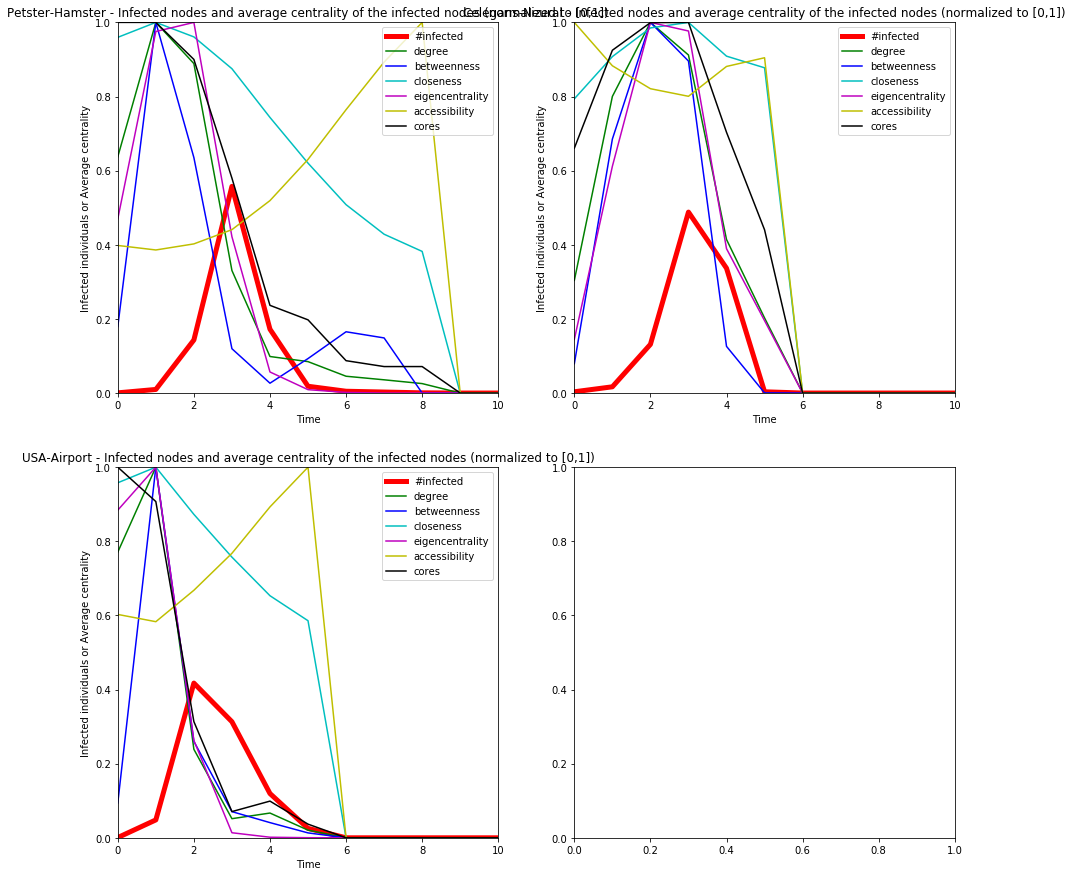

In [409]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax = np.ravel(ax)

names = ["Petster-Hamster", "Celegans-Neural", "USA-Airport"]

keys = ["degree", "betweenness", "closeness", "eigencentrality", "accessibility", "cores"] #"communicability"]

for idx, G in enumerate(allG):
    print(idx, end=" ")
    result = infectionSIR(G, beta=0.7)
    ax[idx].plot(result["time"], np.array(result["infected"]) / len(G),
                 c=colors[0],
                 label="#infected",
                 linewidth=5)
    for idx2, k in enumerate(keys):
        ax[idx].plot(result["time"], np.array(result[k]) / max(result[k]), c=colors[(idx2+1)%len(colors)], label=k)
        
    ax[idx].legend()
    ax[idx].set_title("{} - Infected nodes and average centrality of the infected nodes (normalized to [0,1])".format(names[idx]))
    ax[idx].set_ylim([0, 1])
    ax[idx].set_xlim([0, 10])
    ax[idx].set_xlabel("Time")
    ax[idx].set_ylabel("Infected individuals or Average centrality")

### The interpretation of these plots is as follows. The thick red line is the number of infected individuals; the other lines represent the average centrality (for various centrality measures) of all infected nodes at that point in time.

### Therefore, what these plots are showing is that the centrality peak happens right before the peak of infected individuals. This is expected, as it means high-degree nodes are spreading the infection to many other nodes.

### It is sort of hard to see, but the "degree", "betweeness" and "eigenvector centrality" seem to be the most reliable measures for detecting when the peak will happen.

### I don't think we will see anything interesting by plotting this with the removed individuals, but let us try anyway.

0 degree betweeness closeness eigen core 1 degree betweeness closeness eigen core 2 degree betweeness closeness eigen core 

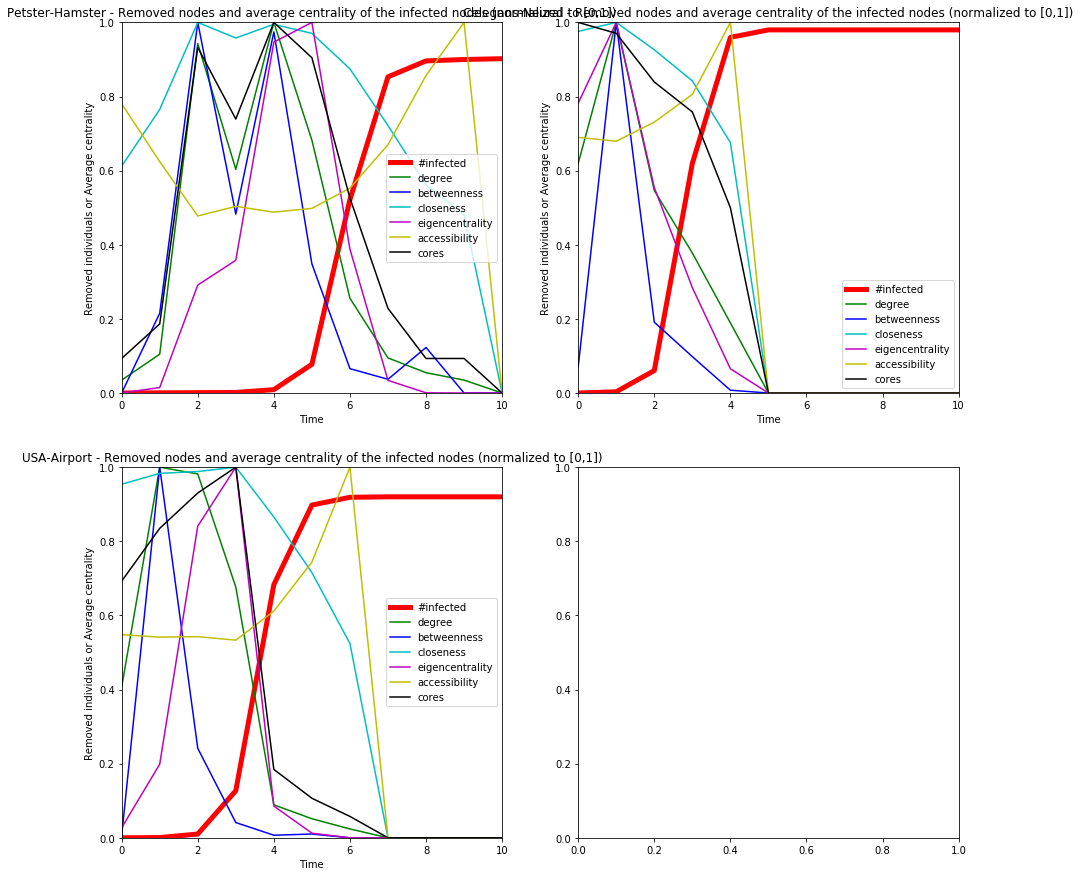

In [410]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax = np.ravel(ax)

names = ["Petster-Hamster", "Celegans-Neural", "USA-Airport"]

keys = ["degree", "betweenness", "closeness", "eigencentrality", "accessibility", "cores"] #"communicability"]

for idx, G in enumerate(allG):
    print(idx, end=" ")
    result = infectionSIR(G, beta=0.7)
    ax[idx].plot(result["time"], np.array(result["recovered"]) / len(G),
                 c=colors[0],
                 label="#infected",
                 linewidth=5)
    for idx2, k in enumerate(keys):
        ax[idx].plot(result["time"], np.array(result[k]) / max(result[k]), c=colors[(idx2+1)%len(colors)], label=k)
        
    ax[idx].legend()
    ax[idx].set_title("{} - Removed nodes and average centrality of the infected nodes (normalized to [0,1])".format(names[idx]))
    ax[idx].set_ylim([0, 1])
    ax[idx].set_xlim([0, 10])
    ax[idx].set_xlabel("Time")
    ax[idx].set_ylabel("Removed individuals or Average centrality")

### There does not seem to be anything new to see here. The conclusions are the same as before.

# Problem 3 (Bonus!)

### Since we re-defined the procedure for epidemic simulation to a version that takes too long, we will have to define it again....

In [434]:
def infectionSIR(G, numIterations=100, beta=0.5, mu=1):
    allNodes = list(G.nodes)
    
    infectedNodes = set([random.choice(allNodes)])
    while len(list(G.neighbors(list(infectedNodes)[0]))) <= 3:
        infectedNodes = set([random.choice(allNodes)])
    
    healthyNodes = set([ i for i in allNodes if i not in infectedNodes ])
    recoveredNodes = set()

    degree = G.degree

    
    result = {
        "infected": [len(infectedNodes)],
        "healthy": [len(healthyNodes)],
        "recovered": [len(recoveredNodes)],
        "time": list(range(numIterations+1)),
        "mu": mu,
        "beta": beta,
        "degree": [ mean([ degree[i] for i in infectedNodes ]) ]
    }
    
    # Iterates over time steps
    for t in range(numIterations):
        # See which infected will recover (only at the end of this loop)
        rands = np.random.uniform(0, 1, len(infectedNodes))
        willRecover = rands < mu
        recoverNodes = [ node for rand, node in zip(willRecover, infectedNodes) if rand ]
        
        # First try to infect
        for i in infectedNodes:
            neighbors = set(G.neighbors(i))                 # Get neighbors            
            neighbors = neighbors.difference(infectedNodes)  # We want only the non-infected ones
            neighbors = neighbors.difference(recoveredNodes) # Also remove the recovered ones (cant infect)
            neighbors = np.array(list(neighbors))
            
            rands = np.random.uniform(0, 1, len(neighbors)) # Generate a random number for each of them
            wasInfected   = rands < beta # See which of them become infected
            infectedNodes = infectedNodes.union(neighbors[wasInfected])
            healthyNodes  = healthyNodes.difference(neighbors[wasInfected])
            # print(infectedNodes)
            # print(healthyNodes)
        
        # Recover nodes
        infectedNodes = infectedNodes.difference(recoverNodes)
        recoveredNodes = recoveredNodes.union(recoverNodes)
        #print(infectedNodes)
        #print(healthyNodes)
        
        result["infected"].append(len(infectedNodes))
        result["healthy"].append(len(healthyNodes))
        result["recovered"].append(len(recoveredNodes))
        result["degree"].append(mean([ degree[i] for i in infectedNodes ]))
    return result

result = infectionSIR(G1, numIterations=30, beta=0.3)

### Since the simulation is random, we will have to plot multiple times to try to see

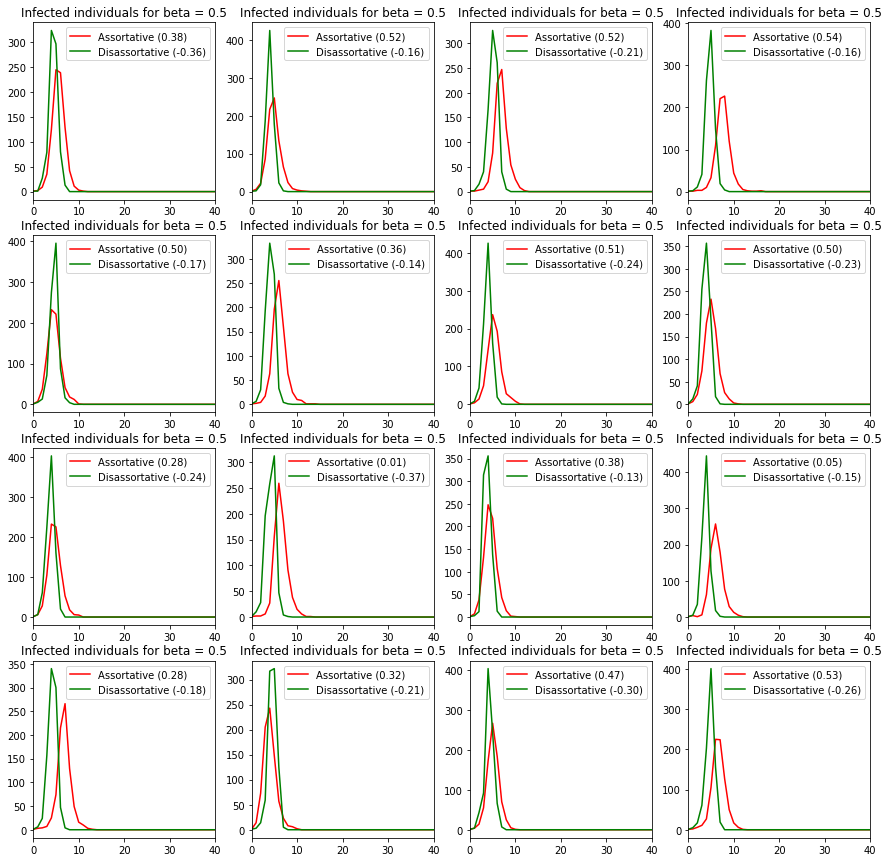

In [433]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15, 15))

ax = np.ravel(ax)

for i in range(16):
    G = xalviBrunet(1000, assortative=True)
    result = infectionSIR(G, beta=0.5)
    ax[i].plot(result["time"], result["infected"],
               label="Assortative ({:.2f})".format(nx.degree_assortativity_coefficient(G)), c=colors[0])

    G = xalviBrunet(1000, assortative=False)
    result = infectionSIR(G, beta=0.5)
    ax[i].plot(result["time"], result["infected"],
               label="Disassortative ({:.2f})".format(nx.degree_assortativity_coefficient(G)), c=colors[1])
    ax[i].set_xlim([0, 40])
    ax[i].legend()
    ax[i].set_title("Infected individuals for beta = 0.5")

### We see that in general the disassortative case has a taller peak. So the infection spreads more easily in a disassortative graph. I can't really figure out why... In either case we have a scale-free graph, so we have a huge number of low-degree nodes and a small amount of high-degree ones.

### In an assortative graph, the high-degree ones are are more connected with each other, and the same can be said for the low-degree ones. In a disassortative one, the high-degree ones are more connected with the low-degree ones. I can't really see why this would change the infection rate.

### Let me plot the degree for each case, maybe it will help

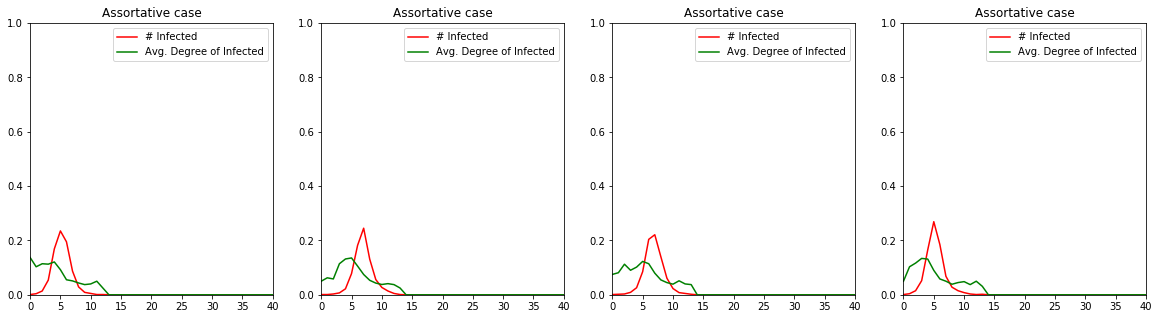

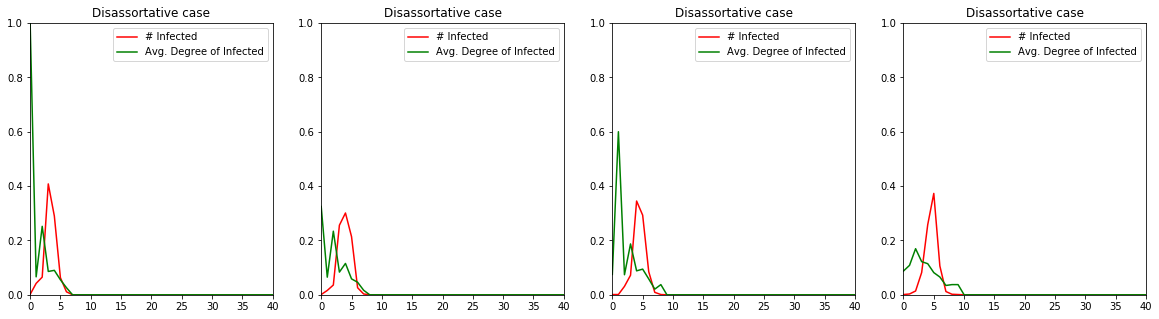

In [455]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=[20, 5])

ax = np.ravel(ax)

for i in range(4):
    G = xalviBrunet(1000, assortative=True)
    result = infectionSIR(G, beta=0.5)
    ax[i].plot(result["time"], np.array(result["infected"]) / 1000,
               label="# Infected".format(nx.degree_assortativity_coefficient(G)), c=colors[0])
    ax[i].plot(result["time"], np.array(result["degree"]) / 80, c=colors[1], label="Avg. Degree of Infected")
    ax[i].set_title("Assortative case")
    ax[i].set_xlim([0, 40])
    ax[i].set_ylim([0, 1])
    ax[i].legend()

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=[20, 5])

ax = np.ravel(ax)

for i in range(4):
    G = xalviBrunet(1000, assortative=False)
    result = infectionSIR(G, beta=0.5)
    ax[i].plot(result["time"], np.array(result["infected"]) / 1000,
               label="# Infected".format(nx.degree_assortativity_coefficient(G)), c=colors[0])
    ax[i].plot(result["time"], np.array(result["degree"]) / 80, c=colors[1], label="Avg. Degree of Infected")
    ax[i].set_title("Disassortative case")
    ax[i].set_xlim([0, 40])
    ax[i].set_ylim([0, 1])
    ax[i].legend()

### Apparently in the disassortative case the degree of the infected nodes increase very rapidly. This means that high-degree nodes are reached very fastly. Maybe because the low-degree nodes are too connected, they only spread infection among themselves, and not the high-degree ones that have high capability of spreading the disease.

### I conclude that further investigation is required... But I will leave this as future work :)